In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Loading the data
bank_data=pd.read_csv("G:/ExcelR_Data/Data_Science_Course/Assignments/Logistic Regression/bank-full.csv",sep=";")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#Checking for null values
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
#Converting categorical data into numeric data
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
bank_data["job"]=le.fit_transform(bank_data["job"])
bank_data["marital"]=le.fit_transform(bank_data["marital"])
bank_data["education"]=le.fit_transform(bank_data["education"])
bank_data["default"]=le.fit_transform(bank_data["default"])
bank_data["housing"]=le.fit_transform(bank_data["housing"])
bank_data["loan"]=le.fit_transform(bank_data["loan"])
bank_data["contact"]=le.fit_transform(bank_data["contact"])
bank_data["month"]=le.fit_transform(bank_data["month"])
bank_data["poutcome"]=le.fit_transform(bank_data["poutcome"])
bank_data["y"]=le.fit_transform(bank_data["y"])

In [6]:
bank_data.shape

(45211, 17)

In [7]:
#Dividing our data into input and output variable
# Model building 
#Building our first model
from sklearn.linear_model import LogisticRegression
X=bank_data.iloc[:,0:16]
Y=bank_data.iloc[:,16]
Model1=LogisticRegression()
Model1.fit(X,Y)

C:\Users\AshishD7715\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
#Evaluating the logistic regression model
#Confusion Matrix
Model1_pred=Model1.predict(X)
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,Model1_pred)
print(confusion_matrix)

[[39279   643]
 [ 4437   852]]


In [9]:
from sklearn.metrics import classification_report
print(classification_report(Y,Model1_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [10]:
# As contact communication type is not that much useful as compare to other so remove contact column
bank_data=bank_data.drop(["contact"],axis=1)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,5,8,198,1,-1,0,3,0


In [11]:
#Build our second model
X2=bank_data.iloc[:,0:15]
Y2=bank_data.iloc[:,15]
Model2=LogisticRegression()
Model2.fit(X2,Y2)

C:\Users\AshishD7715\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
#Evaluating our second model
#Confusion Matrix
Model2_pred=Model2.predict(X2)
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y2,Model2_pred)
print(confusion_matrix)

[[39229   693]
 [ 4410   879]]


In [13]:
print(classification_report(Y2,Model2_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.17      0.26      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [14]:
# Creating new column for storing predicted values of y
bank_data["pred_prob"] = Model2_pred

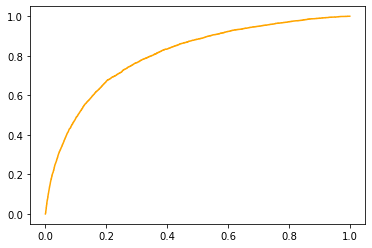

In [15]:
#ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,thresholds=roc_curve(Y2,Model2.predict_proba(X2)[:,1])
auc=roc_auc_score(Y2,Model2_pred)
#print("Acuuracy:",auc,"\n")
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='orange',label='logit model ( area= %0.2f)'%auc)

In [16]:
#Making data set for train and test model by removing "pred_prob" col
bank_data=bank_data.drop("pred_prob",axis=1)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,5,8,198,1,-1,0,3,0


In [17]:
# Dividing data into train and test data sets
from sklearn.model_selection import train_test_split

In [18]:
train,test = train_test_split(bank_data,test_size=0.3)

In [19]:
# Building a model on train data set 
import statsmodels.formula.api as sm
train_model = sm.logit('y~age+job+marital+education+default+balance+housing+loan+day+month+duration+campaign+pdays+previous+poutcome',data = train).fit()

Optimization terminated successfully.
         Current function value: 0.273409
         Iterations 7


In [20]:
#summary
train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31631
Method:                           MLE   Df Model:                           15
Date:                Wed, 24 Feb 2021   Pseudo R-squ.:                  0.2369
Time:                        15:15:52   Log-Likelihood:                -8652.6
converged:                       True   LL-Null:                       -11339.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7825      0.173    -21.832      0.000      -4.122      -3.443
age            0.0045      0.002      2.229      0.026       0.001       0.008
job            0.0066      0.006      1.033      0.302      -0.006       0.019
marital        0.2070      0.037      5.628      0.000       0.135       0.279
education      0.2353      0.027      8.740      0.000       0.183       0.288
default       -0.4300      0.193     -2.232      0.026      -0.808      -0.052
balance     2.063e-05   5.47e-06      3.769      0.000     9.9e-06    3.14e-05
housing       -1.1459      0.045    -25.515      0.000      -1.234      -1.058
loan          -0.6444      0.068     -9.530      0.000      -0.777      -0.512
day           -0.0023      0.002     -0.938      0.348      -0.007       0.002
month          0.0030      0.007      0.465      0.642      -0.010       0.016
duration       0.0039   7.09e-05     54.420      0.000       0.004       0.004
campaign      -0.1315      0.012    -11.107      0.000      -0.155      -0.108
pdays          0.0038      0.000     12.598      0.000       0.003       0.004
previous       0.0935      0.010      9.628      0.000       0.074       0.112
poutcome       0.1358      0.034      3.937      0.000       0.068       0.203
==============================================================================
"""

In [21]:
train_pred = train_model.predict(train.iloc[:,0:15])

In [22]:
train_pred.shape

(31647,)

In [23]:
# filling all the cells with zeroes
train["train_pred"] = np.zeros(31647)

<ipython-input-23-f44cbecd5172>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["train_pred"] = np.zeros(31647)


In [24]:
# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
train.loc[train_pred>0.5,"train_pred"] = 1

C:\Users\AshishD7715\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [25]:
# confusion matrix 
confusion_matrix = pd.crosstab(train['y'],train.train_pred)
confusion_matrix

train_pred,0.0,1.0
y,,
0,27453,532
1,2920,742


In [26]:
train_accuracy=(27453+532)/31647
train_accuracy

0.8842860302714317

In [27]:
# Prediction on Test data set
test_pred = train_model.predict(test)

In [28]:
test_pred.shape

(13564,)

In [29]:
# filling all the cells with zeroes
test["test_pred"] = np.zeros(13564)

<ipython-input-29-de5b8ebe3e6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["test_pred"] = np.zeros(13564)


In [30]:
# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
test.loc[test_pred>0.5,"train_pred"] = 1

C:\Users\AshishD7715\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\AshishD7715\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
# confusion matrix 
confusion_matrix_test = pd.crosstab(test['y'],test.test_pred)
confusion_matrix_test

test_pred,0.0
y,
0,11937
1,1627


In [32]:
test_accuracy=(11937)/13564
test_accuracy

0.8800501327042171